<h3>
GA to get optimise solution for TSP
</h3>

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [3]:
random.seed(147)

In [4]:
def generate_coordinates(num,xrange=(1,500),yrange=(1,500)):
    """
    generate num no of random co ordinate  with range for x,y
    be xrange and yrange respectively
    params: num -- no of co ordinate
          : xrange -x co ordinate range
          : yrange -y co ordinate range
    
    return: return dic with num  no of randomly genrated co ordinate 
    """
    vertices = dict()
    for  i in range(1,num+1):
        x,y = random.randint(xrange[0],xrange[1]),random.randint(yrange[0],yrange[1])
        vertices[i] = (x,y)
        
    return vertices
        
        
        

In [5]:
V = generate_coordinates(15)
V

{1: (310, 329),
 2: (77, 475),
 3: (484, 202),
 4: (226, 315),
 5: (230, 94),
 6: (321, 449),
 7: (378, 453),
 8: (411, 434),
 9: (160, 213),
 10: (432, 236),
 11: (368, 53),
 12: (238, 181),
 13: (36, 436),
 14: (215, 416),
 15: (179, 177)}

In [6]:
def population(num,nvertex):
    """
    generate num no of paths/ solution 
    params : num --> population size
           : nvertex --> no of vertex 
    returns: list of list containing population
    """
    initial = [i for  i in range(1,nvertex+1)]
    pop =[]
    for i in range(num):
        random.shuffle(initial)
        pop.append(initial[::])
        
    return pop
    
    

In [13]:
def show_solution(seq,vertex_dic,best=False,*argv):
    """
    Helps in visualization of selected path
    params: seq --> seqention in which vertex is visited
          : vertex_dic --> dictionary of vertex with co ordinate as value
    
    """
    X = []
    Y = []
    for  i in range(len(seq)):
        x1,y1 = vertex_dic[seq[i]]
        X.append(x1)
        Y.append(y1)
    X.append(X[0])
    Y.append(Y[0])
    if best:
        plt.title('Best Ever Cost :' + str(distance(seq,vertex_dic)) + " \n Iteration :" + str(argv[0]) )
    plt.plot(X,Y,color='red',marker='o',markerfacecolor='blue')
    plt.show()
    
    

In [14]:
population(10,15)

[[1, 15, 5, 13, 2, 4, 8, 12, 3, 6, 10, 9, 7, 14, 11],
 [10, 11, 6, 15, 13, 1, 9, 4, 8, 12, 2, 3, 5, 7, 14],
 [3, 13, 10, 5, 12, 4, 2, 9, 7, 1, 8, 15, 14, 11, 6],
 [7, 9, 8, 1, 12, 10, 6, 14, 13, 4, 3, 15, 11, 2, 5],
 [3, 15, 1, 9, 6, 4, 12, 11, 2, 5, 10, 13, 7, 8, 14],
 [12, 13, 15, 9, 8, 2, 7, 4, 1, 14, 6, 10, 3, 11, 5],
 [8, 10, 13, 9, 4, 1, 5, 12, 15, 2, 7, 6, 3, 11, 14],
 [5, 4, 15, 1, 13, 9, 7, 3, 12, 2, 10, 8, 14, 11, 6],
 [10, 15, 5, 8, 2, 9, 4, 1, 7, 6, 12, 11, 3, 13, 14],
 [14, 8, 4, 1, 11, 5, 15, 6, 13, 2, 10, 12, 3, 7, 9]]

In [15]:
def distance(listA,vertex_dic):
    """
    calculate total distance cover if visited 
    in sequence of listA.
    
    params: listA --> list of vertex visited in sequence
          : vertex_dic --> dictionary of vertex with value as coordinate 
    return : total distance travel
    
    """
    
    n = len(listA)
    dist = 0
    for  i in range(1,n):
        x1,y1 =  vertex_dic[listA[i]]
        x2,y2 = vertex_dic[listA[i-1]]
        dist += ((x1-x2)**2 + (y1-y2)**2)**0.5
        
    x1,y1  = vertex_dic[listA[0]]
    x2,y2 = vertex_dic[listA[n-1]]
    dist += ((x1-x2)**2 + (y1-y2)**2)**0.5
    
    return dist

        
    

In [16]:
pop = population(10,15)
pop

[[13, 8, 4, 14, 2, 9, 3, 15, 10, 12, 11, 7, 5, 6, 1],
 [7, 14, 9, 11, 12, 1, 10, 13, 15, 8, 5, 4, 2, 6, 3],
 [14, 4, 6, 3, 9, 2, 15, 1, 7, 13, 10, 11, 5, 8, 12],
 [10, 15, 4, 3, 6, 12, 7, 1, 8, 9, 13, 2, 5, 14, 11],
 [7, 6, 15, 12, 9, 14, 4, 11, 1, 8, 3, 5, 10, 13, 2],
 [10, 15, 5, 12, 2, 4, 3, 8, 9, 14, 11, 1, 6, 7, 13],
 [14, 1, 12, 7, 11, 15, 3, 8, 2, 13, 4, 6, 9, 5, 10],
 [15, 4, 8, 11, 2, 12, 14, 6, 13, 9, 5, 10, 1, 7, 3],
 [12, 6, 4, 2, 3, 15, 13, 9, 1, 8, 7, 10, 5, 14, 11],
 [3, 12, 11, 7, 10, 6, 4, 2, 14, 5, 13, 15, 9, 8, 1]]

In [17]:
distance(pop[0],V)

3965.137115329505

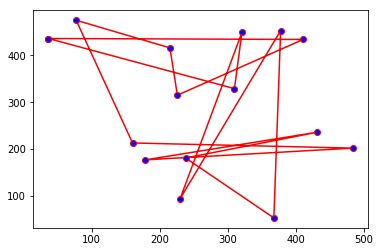

In [18]:
show_solution(pop[0],V)

In [19]:
def convert_to_cordinate(Seq,V):
    """
    given seq of vertex return seq of 
    co ordinate tuples
    Params : Seq --> seq of vertex
           : V --> Vertex dictionary
           
    Return : list of co ordinate tuples
    """
    X = []
    #print(Seq)
    for i in range(len(Seq)):
        X.append(V[Seq[i]])
        
    return X

In [20]:
def crossover(current ,elite ):
    
    """
    Crossover the agents or solutions 
    Params: current --> all current generation agents
          : elite --> selected agents with highest fitness
    
    return : all possible cross over agent
    
    """
    
    
    crossOverList = []
    n =  len(current)
    length_agent = len(current[0])
    for  i in range(n):
        for  j in range(len(elite)):
            l ,r  = random.randint(1,length_agent-1),random.randint(1,length_agent-1)
            if l > r:
                l,r = r,l
            #cross  = [0]*length_agent
            cross = elite[j][l:r+1]
            value  = list(set(current[i]) -set(elite[j][l:r+1]))
            it  = iter(value)
            
            for k in  range(0 , l):
                cross.insert(k,next(it))
                
            for  k in range(r+1,length_agent):
                cross.insert(k,next(it))
                
            crossOverList.append(cross)
    return crossOverList
    
            
            

In [21]:
def mutation(listSeq,prob):
    """
    Mutate  all agent based on probability
    Params : listSeq --> list of all agents / solutions
           : prob --> probabilty on which mutation based on
    Return : Mutated agents/solution
    """
    length_agent  =  len(listSeq[0])
    for i in range(len(listSeq)):
        
        mutate_prob =  random.uniform(0,1)
        """
        mutate if only if mutate_prob <= prob
        """
        if prob >= mutate_prob:
            x,y = 0,0
            while x == y:
                x,y = random.randint(0,length_agent-1),random.randint(0,length_agent-1)
            #print(i ,x,y)
            listSeq[i][x],listSeq[i][y] = listSeq[i][y],listSeq[i][x]
    return listSeq 
        

In [22]:
def fitness(pop,vertexDic):
    """
    calculate and return fitness of all agents /solution
    Params: pop --> list of all agents/solution 
          : vertexDic --> vertex dictionary 
          
    returns : calculate fitness list in terms of probability
    """
    fit  = []
    
    for i in range(len(pop)):
        
        fit.append(1/ (1+ distance(pop[i],vertexDic)))
        
    """
    calculate fitness in terms of probability 
    """
    base  = sum(fit)
    for  i in range(len(fit)):
        fit[i] = fit[i]/base
        
    return fit

In [23]:
"""
choose k agent based on fitness probabilty
here  we choose  k = 5

"""
random.choices(pop,fitness(pop,V),k = 5)


[[10, 15, 4, 3, 6, 12, 7, 1, 8, 9, 13, 2, 5, 14, 11],
 [15, 4, 8, 11, 2, 12, 14, 6, 13, 9, 5, 10, 1, 7, 3],
 [7, 14, 9, 11, 12, 1, 10, 13, 15, 8, 5, 4, 2, 6, 3],
 [3, 12, 11, 7, 10, 6, 4, 2, 14, 5, 13, 15, 9, 8, 1],
 [3, 12, 11, 7, 10, 6, 4, 2, 14, 5, 13, 15, 9, 8, 1]]

In [24]:
def bestever(pop,vertexDic):
    """
   Params: pop --> list of all agents/solution 
         : vertexDic --> vertex dictionary 
          
    returns : best agent/solution so far
    """
    fit = fitness(pop,vertexDic)
    index =  0 
    n = len(fit)
    for  i in range(1,n):
        if fit[i] > fit[index]:
            index  = i
    return (fit[index],index)

    

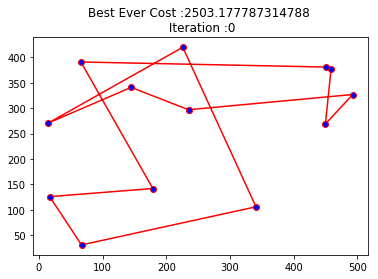

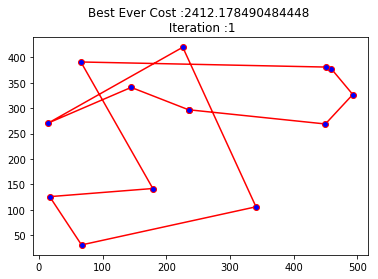

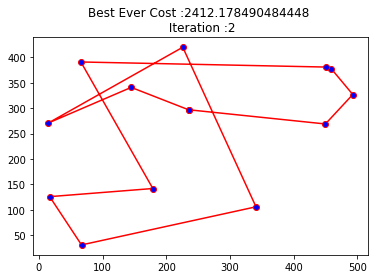

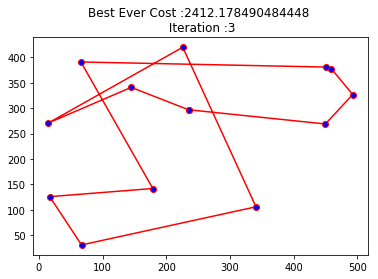

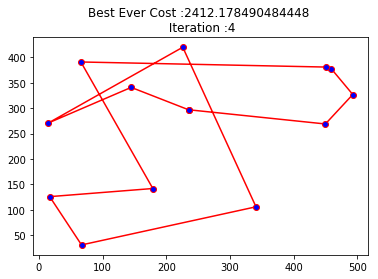

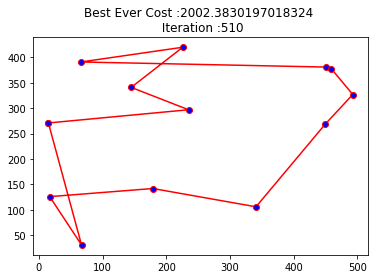

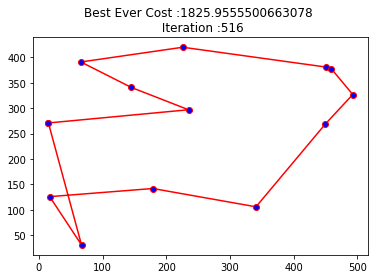

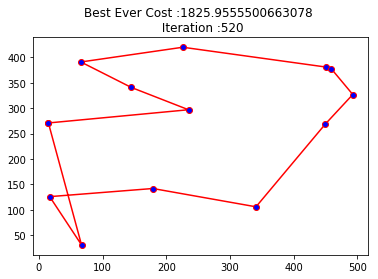

In [26]:
iterations  = 1000
size = 100
num_vertex = 13
random.seed(40)
V = generate_coordinates(num_vertex)

pop = population(size,num_vertex)

best,index = bestever(pop,V)
solution = pop[index][::]
distance_metric  = [distance(pop[index],V)]
#show_solution(pop[index],V,True)
for  i in range(iterations):
    
    """
    Cross over
    """
    elite = sorted(pop,key = lambda x: distance(x,V))
    
    children = crossover(pop,elite[:50])
    pop.extend(children)
    
    """
    Mutate with  15% probability
    """
    pop = mutation(pop,0.15)
    """
    Select K Fittest 
    """
    
    pop = random.choices(pop,fitness(pop,V),k = size)
    #print(pop[0])
    bestX,X = bestever(pop,V)
    distance_metric.append(distance(pop[X],V))
    if bestX > best:
        #print(pop[X])
        best = bestX
        solution = pop[X][::]
        index = int(X)
        show_solution(pop[X],V,True,i)
    

    #print(i)
    